In [1]:
'''
Dependencies
'''
# General
from sklearn.decomposition import PCA
from tqdm.auto import tqdm
import scipy.io as sio
import pandas as pd
import numpy as np
import scipy
import sys
import warnings 
warnings.simplefilter('ignore')

# Utils and specific functions
from pyaldata import * 
sys.path.insert(0, '..') # rutils is in main folder directory
from rutils import *

# Plotting
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_style('white')
cc = ['#D1F2DE', '#BDE7CD', '#A9DCBD', '#95D0AC', '#81C59B', '#6CBA8A', '#58AF7A', '#44A369', '#309858']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cc)
gr_cmap = sns.light_palette('#309858')

'''
Magic commands
'''
%config InlineBackend.figure_format = 'retina'

In [3]:
'''
Sessions. Note that VR sessions have typically more neurons than CF sessions
'''

sessions_vr = [
 'Chewie_CO_VR_2016-09-09.mat', # File Matt used to generate initial figures
 'Chewie_CO_VR_2016-09-12.mat',
 'Chewie_CO_VR_2016-09-14.mat',
 'Chewie_CO_VR_2016-10-06.mat',
 'Mihili_CO_VR_2014-03-03.mat',
 'Mihili_CO_VR_2014-03-04.mat',
 'Mihili_CO_VR_2014-03-06.mat',
]

sessions_cf = [
    'Chewie_CO_FF_2016-09-15.mat',
    'Chewie_CO_FF_2016-09-21.mat',
    'Chewie_CO_FF_2016-10-05.mat',
    'Chewie_CO_FF_2016-10-07.mat',
    'Mihili_CO_FF_2014-02-03.mat',
    'Mihili_CO_FF_2014-02-17.mat',
    'Mihili_CO_FF_2014-02-18.mat',
    'Mihili_CO_FF_2014-03-07.mat'
]

In [4]:
'''
Pick a session and load in as pandas dataframe
'''

session = sessions_vr[0]
df = mat2dataframe('/Users/Daphne/Data/' + session, shift_idx_fields=True)
s_monkey = session[:1]

print(f'\n Selected session: {session} \n')


 Selected session: Chewie_CO_VR_2016-09-09.mat 




---

> `read_cmp()`

The `.cmp` file contains the location of the electrodes on the array.

We want to know the spatial location of electrodes so that we know the spatial location of the recorded neurons.

Note that, while an array is a 10x10 grid, there are only 96 electrodes on a given array due to hardware constraints. 

By default, omitted electrodes (dead electrodes) are the 4 corner grids. If something goes wrong during fabrication however, this may change.

---

In [7]:
m1_array = read_cmp('/Users/Daphne/Data/Chewie Left M1 SN 6250-001474.cmp')
pmd_array = read_cmp('/Users/Daphne/Data/Chewie Left PMd SN 6251-001469.cmp')

In [8]:
m1_array.head()

array_col  array_row channel_num  within_channel_num  global_enum
0          0          8           C                   1           96
1          0          7           C                   3           95
2          0          6           C                   5           94
3          0          5           C                   7           93
4          0          4           C                   9           92

---

> `localize_elecs()`

Get the spatial location of electrodes on the array. Set `verbose=True` to visualise the array.

---

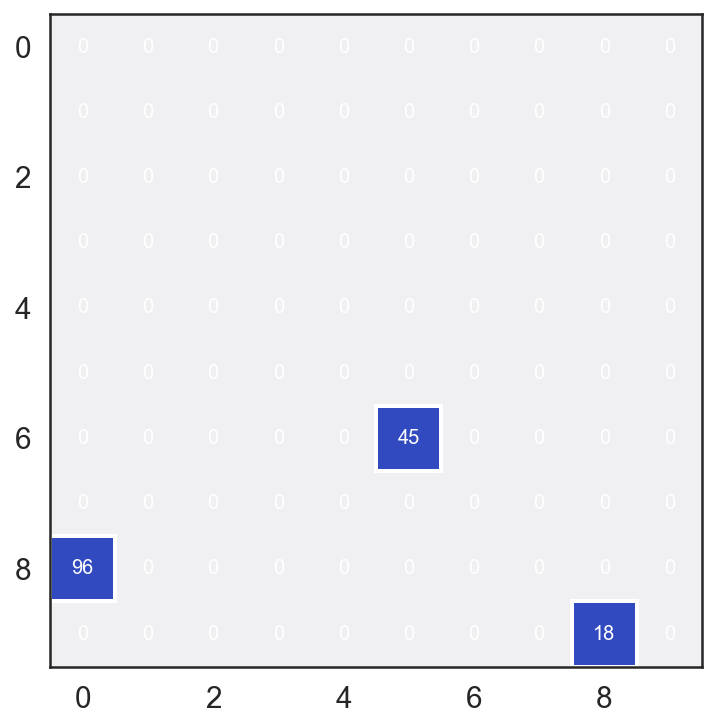

In [10]:
localize_elecs(m1_array, elecs=[96, 18, 45], verbose=True);


For the M1 array, we see that indeed all corner squares are omitted.


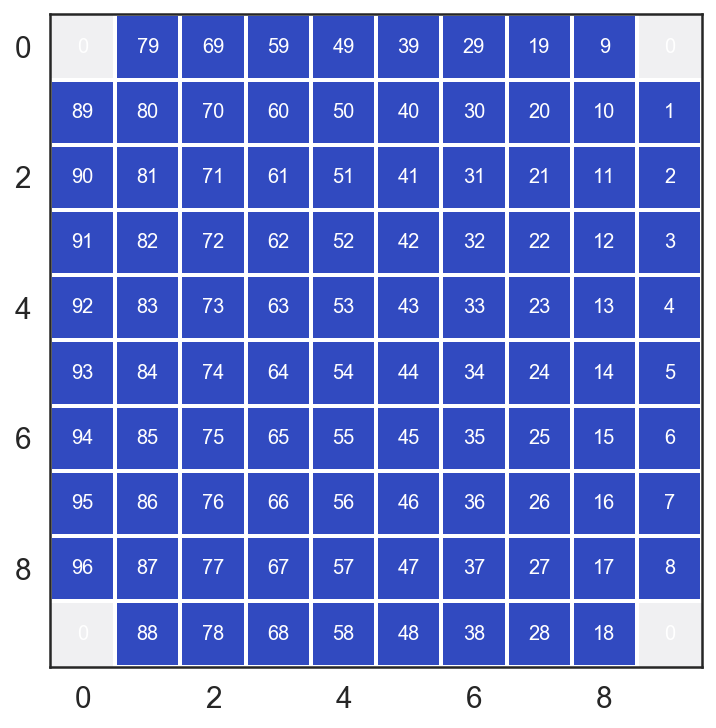

In [11]:
localize_elecs(df_m1_arr, elecs=range(1,97), verbose=True);

For the PMd array one dead electrode has a different location.

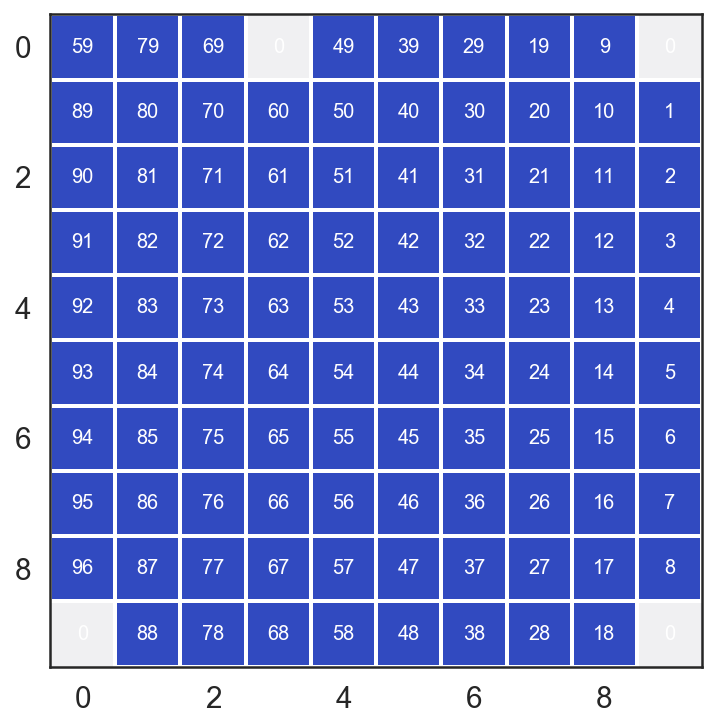

In [12]:
localize_elecs(df_pmd_arr, elecs=range(1,97), verbose=True);

The colored grids are just for visualisation purposes, we can use the np arrays to continue.

We have the spatial location of each electrode and we have **unit guides** that specify how many neurons each electrode covers in this way:

```
[electrode k, neuron 1]
[electrode k, neuron 2]
[electrode k, neuron 3]
[electrode k+1, neuron 1]
etc.
```  

While the unit guides are `(774 x N)` (we have a unit guide for each row), they are all equal. So we can pick an arbitrary row. 


Connecting these two, we can get the spatial location of all $N$ neurons on the array.

In [13]:
m1_emap  = localize_elecs(m1_array, elecs=range(1,97))
pmd_emap = localize_elecs(pmd_array, elecs=range(1,97))

---

> `elecs_to_neurons()` 

provides a mapping between each electrode number and the number of cells to that electrode

---

---

> `make_raster()` 

makes a raster plot given a set of spike trains

---

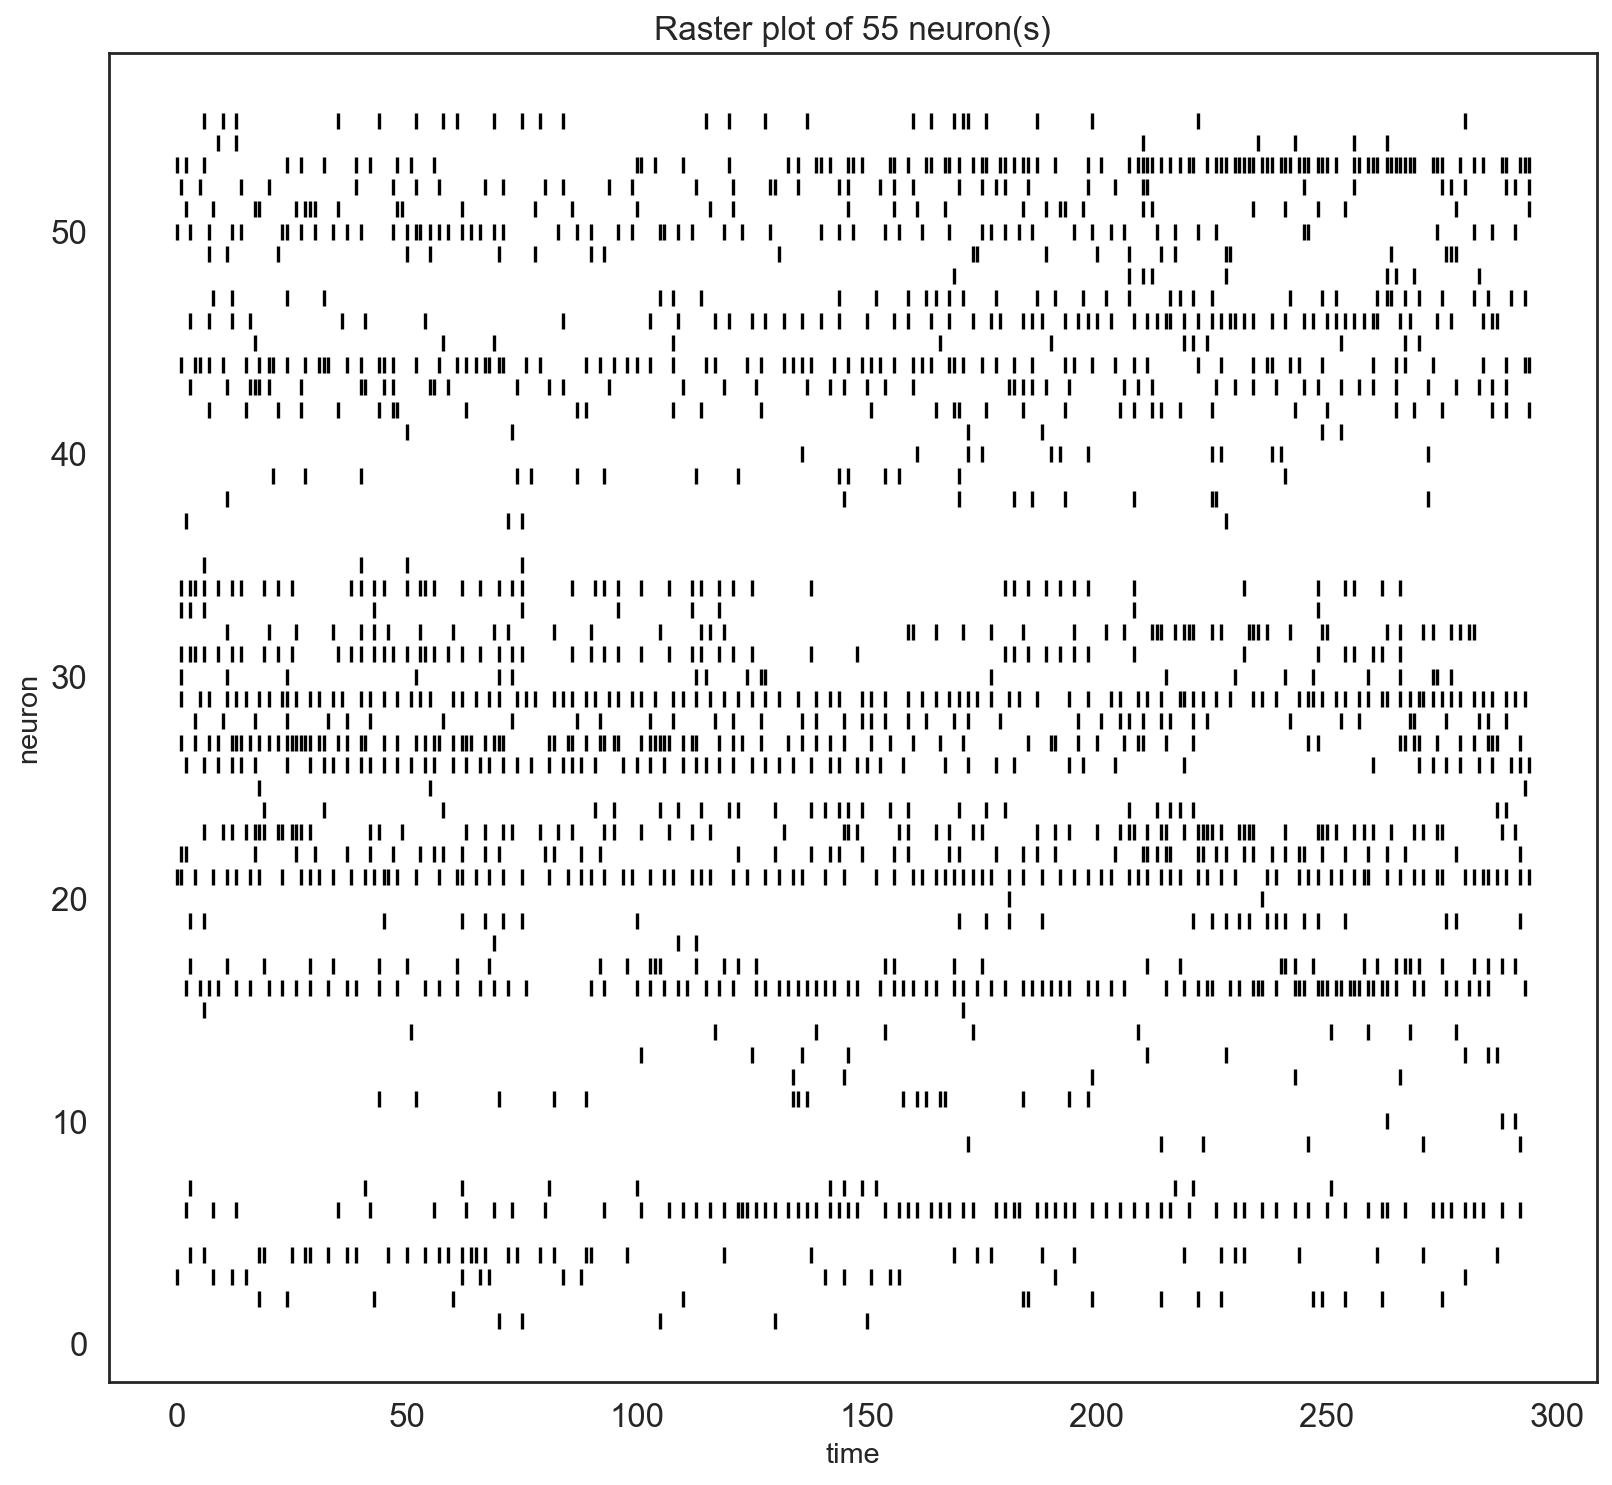

In [14]:
make_raster(df['M1_spikes'][0])